## 真假职位预测

### 一、数据分析

#### 1.导入库包

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
# 可视化
import seaborn as sns
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

#### 2.导入数据

In [38]:
df=pd.read_csv(r'data\fake_job_postings.csv',encoding='utf-8')
display(df.head(5),df.info(),df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


None

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


##### 各字段推测
job_id: 工作的唯一标识符。

title: 职位名称或工作头衔。

location: 工作地点，通常包括国家、州和城市。

department: 该职位所属的公司部门。

salary_range: 薪资范围。这个字段在大多数样本中是缺失的（NaN），意味着薪资信息可能没有公开或者不适用。

company_profile: 公司简介或描述。

description: 职位的具体描述，包括工作的性质、职责等。

requirements: 应聘该职位的要求或资格条件。

benefits: 提供给员工的福利。

telecommuting: 是否提供远程工作选项，1表示提供，0表示不提供。

has_company_logo: 公司是否提供了标志，1表示有，0表示无。

has_questions: 是否包含其他问题，比如应聘者可能需要回答的问题。1表示有，0表示无

employment_type: 雇佣类型，例如全职（Full-time）、兼职、实习（Internship）等。

required_experience: 所需的工作经验水平，例如初级、中级、高级。

required_education: 所需的最低教育程度，如高中文凭、学士学位、硕士学位等。

industry: 该职位所在的行业。

function: 工作职能或职位的主要功能分类。

fraudulent: 标记该职位列表是否为欺诈性的，1表示是，0表示否。

In [39]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

#### 3.查看缺失值

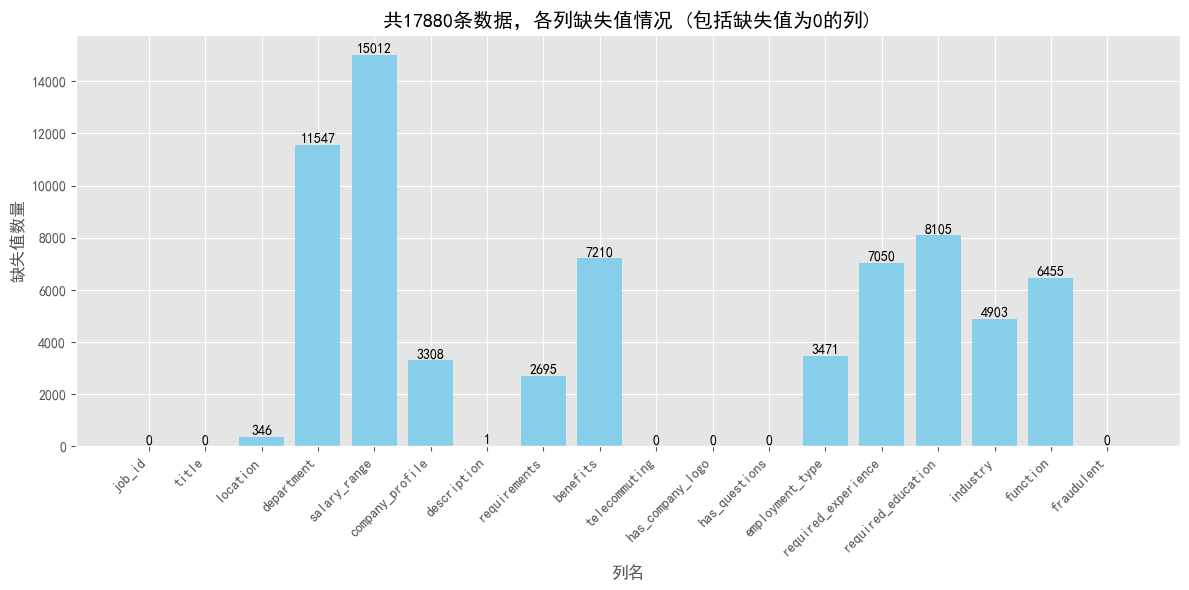

In [40]:
# 计算每列的缺失值数量（包括缺失值为0的列）
missing_values = df.isnull().sum()

# 创建一个新的DataFrame，用于存储列名和对应的缺失值数量
missing_df = pd.DataFrame({'column_name': missing_values.index, 'missing_count': missing_values.values})

plt.style.use('ggplot')

# 创建条形图
fig, ax = plt.subplots(figsize=(12, 6))  
bars = ax.bar(missing_df.column_name, missing_df.missing_count, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
ax.set_xlabel('列名')
ax.set_ylabel('缺失值数量')
ax.set_title(f'共{df.shape[0]}条数据，各列缺失值情况 (包括缺失值为0的列)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

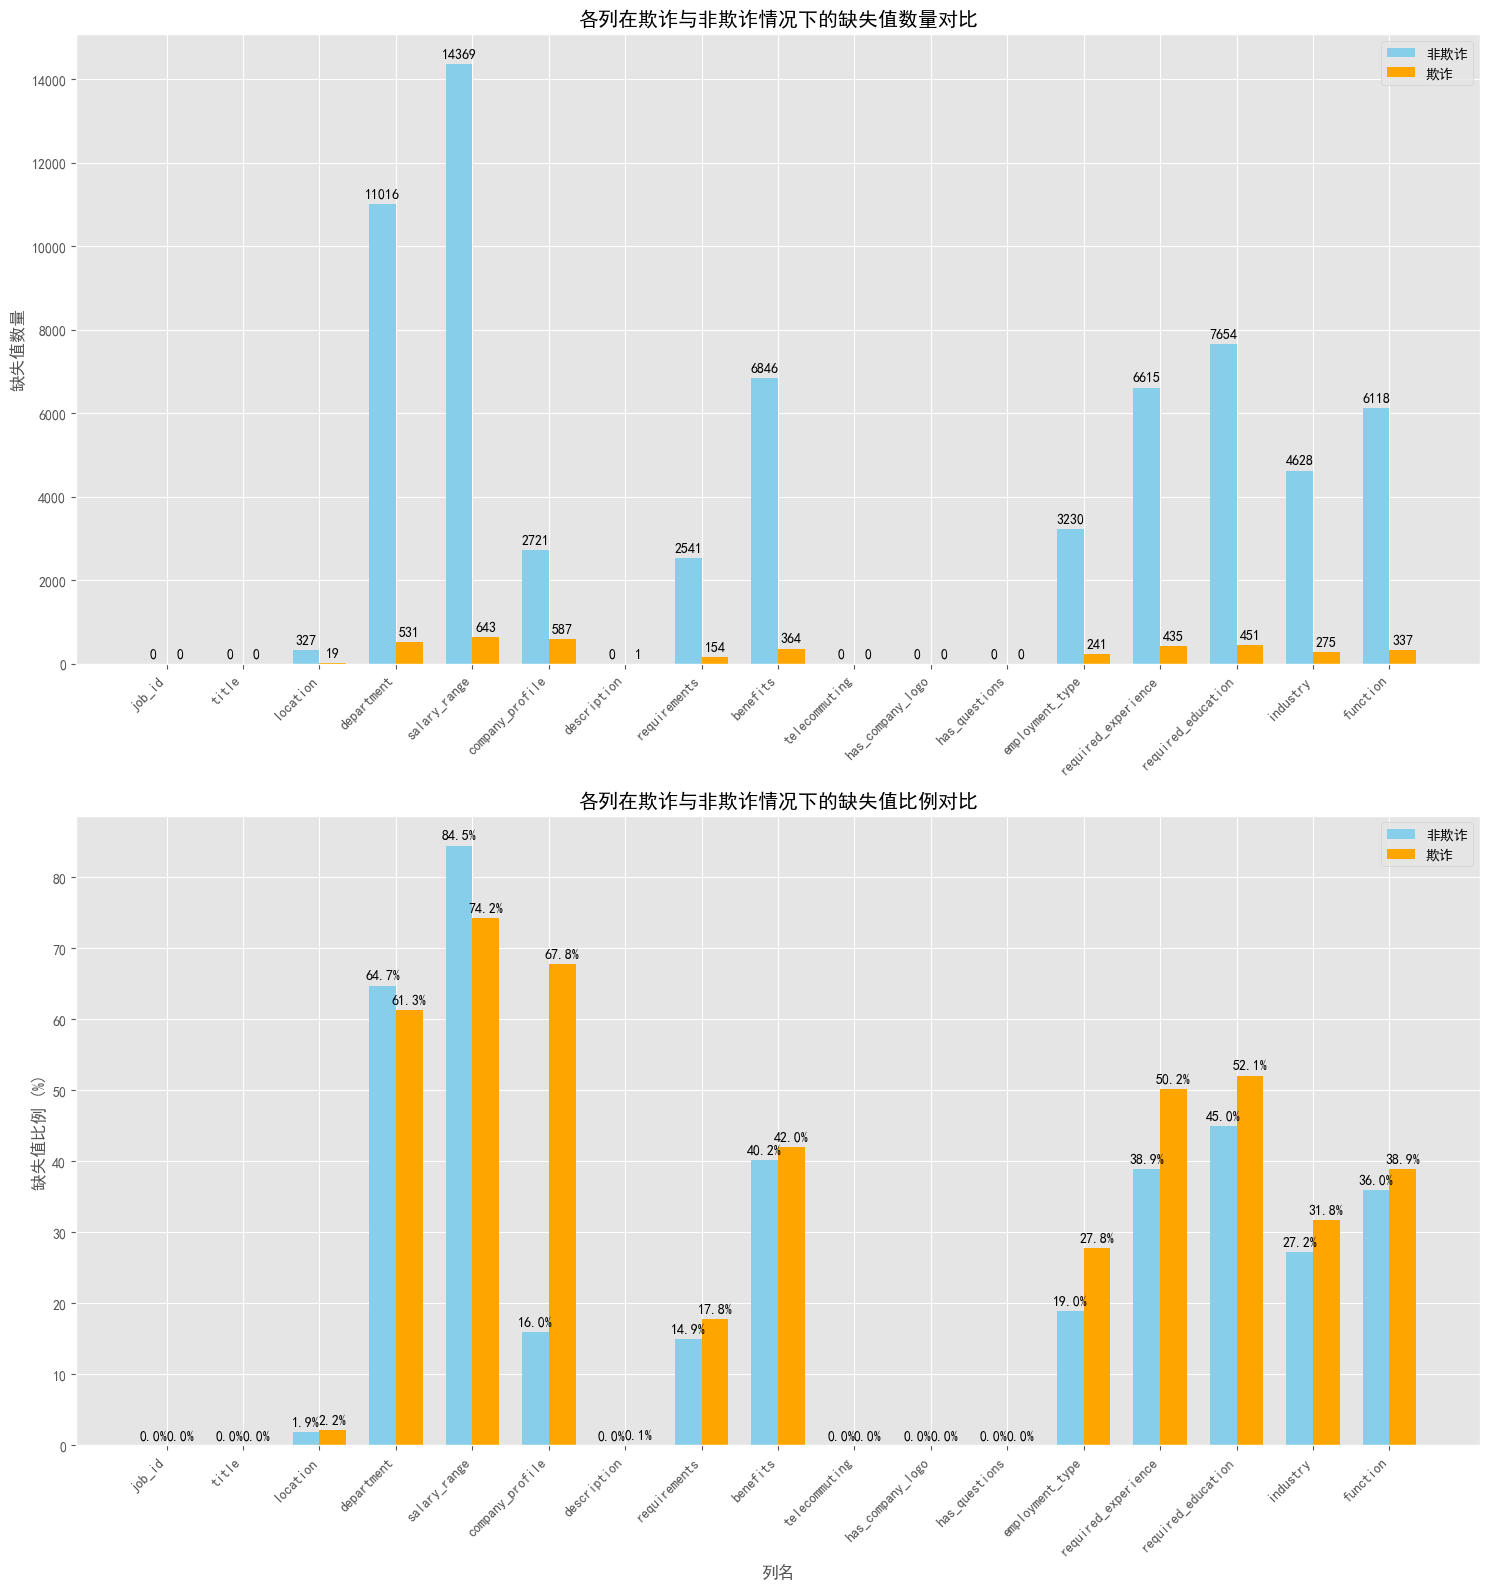

In [41]:
columns_to_check = [col for col in df.columns if col != 'fraudulent']

stats_list_counts = []
stats_list_ratios = []

for column in columns_to_check:
    fraud_grouped = df.groupby('fraudulent')[column].apply(lambda x: x.isnull().sum()).reset_index()
    
    total_counts = df.groupby('fraudulent').size()

    missing_ratio_0 = (fraud_grouped.loc[fraud_grouped['fraudulent'] == 0, column].values[0] / total_counts.get(0, 1) * 100 
                       if not fraud_grouped.empty and 0 in fraud_grouped['fraudulent'].values else 0)
    missing_ratio_1 = (fraud_grouped.loc[fraud_grouped['fraudulent'] == 1, column].values[0] / total_counts.get(1, 1) * 100 
                       if not fraud_grouped.empty and 1 in fraud_grouped['fraudulent'].values else 0)
    
    stats_list_counts.append({
        'column_name': column,
        'is_fraud_0': fraud_grouped.loc[fraud_grouped['fraudulent'] == 0, column].values[0] if not fraud_grouped.empty and 0 in fraud_grouped['fraudulent'].values else 0,
        'is_fraud_1': fraud_grouped.loc[fraud_grouped['fraudulent'] == 1, column].values[0] if not fraud_grouped.empty and 1 in fraud_grouped['fraudulent'].values else 0,
    })
    
    stats_list_ratios.append({
        'column_name': column,
        'is_fraud_0_ratio': missing_ratio_0,
        'is_fraud_1_ratio': missing_ratio_1,
    })

missing_counts = pd.DataFrame(stats_list_counts)
missing_ratios = pd.DataFrame(stats_list_ratios)

bar_width = 0.35
index = range(len(missing_counts))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 16), sharex=False)  # 不共享x轴

# 第一个子图 - 缺失值数量
bars1 = ax1.bar(index, missing_counts['is_fraud_0'], bar_width, label='非欺诈', color='skyblue')
bars2 = ax1.bar([p + bar_width for p in index], missing_counts['is_fraud_1'], bar_width, label='欺诈', color='orange')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

ax1.set_title('各列在欺诈与非欺诈情况下的缺失值数量对比')
ax1.set_ylabel('缺失值数量')
ax1.legend()
ax1.set_xticks([p + bar_width / 2 for p in index])  # 显示第一个子图的x轴刻度
ax1.set_xticklabels(missing_counts['column_name'], rotation=45, ha='right', fontweight='bold')  # 设置x轴标签，字体加粗

# 第二个子图 - 缺失值比例
bars3 = ax2.bar(index, missing_ratios['is_fraud_0_ratio'], bar_width, label='非欺诈', color='skyblue')
bars4 = ax2.bar([p + bar_width for p in index], missing_ratios['is_fraud_1_ratio'], bar_width, label='欺诈', color='orange')

def add_ratio_labels(bars, ratios):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ratio_str = f'{ratios.iloc[i]:.1f}%' if not pd.isna(ratios.iloc[i]) else '0%'
        ax2.annotate(ratio_str,
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  
                     textcoords="offset points",
                     ha='center', va='bottom')

add_ratio_labels(bars3, missing_ratios['is_fraud_0_ratio'])
add_ratio_labels(bars4, missing_ratios['is_fraud_1_ratio'])

ax2.set_title('各列在欺诈与非欺诈情况下的缺失值比例对比')
ax2.set_xlabel('列名')
ax2.set_ylabel('缺失值比例 (%)')
ax2.legend()
ax2.set_xticks([p + bar_width / 2 for p in index])  # 显示第二个子图的x轴刻度
ax2.set_xticklabels(missing_counts['column_name'], rotation=45, ha='right', fontweight='bold')  # 设置x轴标签，字体加粗

plt.tight_layout()

plt.show()

#### 各列在欺诈与非欺诈情况下的缺失值比例对比图解读
蓝色条形代表非欺诈情况下的缺失值数量，橙色条形代表欺诈情况下的缺失值数量。
##### 1.字段'company_profile'在欺诈时缺失值比例远远高于非欺诈情况下的缺失值比例，这里可以初步判断如果'company_profile'缺失了，那么很有可能是属于欺诈类别的。
##### 2.字段'salary_range'无论在欺诈还是非欺诈的情况下其缺失值都很高，那么这时该字段可能对于分类模型学习没有显著效果，所以在后面特征工程时放弃该字段。
##### 3.文本型字段和字符型的分类字段都有缺失，选择用'Missing'填充

#### 4.查看目标标签fraudulent值分布

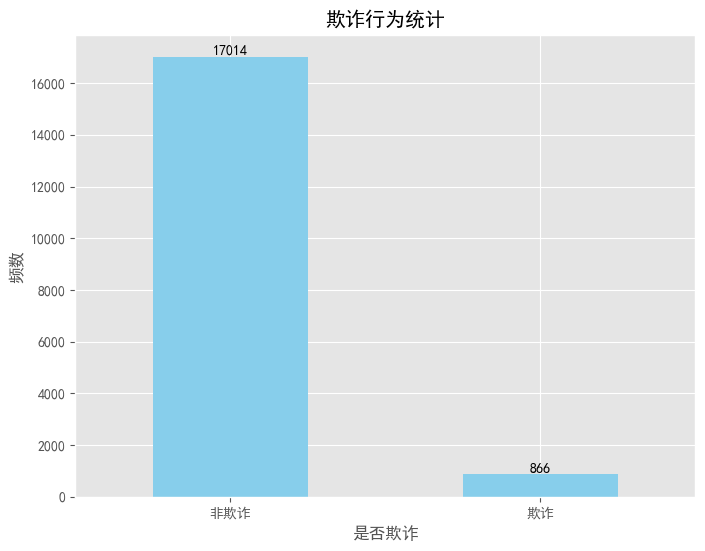

In [42]:
# 统计 'fraudulent' 列中各个值的数量
value_counts = df['fraudulent'].value_counts().sort_index()

# 创建条形图并获取轴对象
ax = value_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))

# 添加标题和轴标签
plt.title('欺诈行为统计')
plt.xlabel('是否欺诈')
plt.ylabel('频数')

# 设置x轴刻度标签为横向排列
plt.xticks(rotation=0)

# 设置x轴刻度标签
plt.xticks([0, 1], ['非欺诈', '欺诈'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(str(height),
                xy=(p.get_x() + p.get_width() / 2, height ),  
                ha='center', va='bottom')  

# 显示图表
plt.show()

##### 欺诈统计图表中显示：欺诈数很少，样本类别严重不平衡

#### 5.相关性分析

In [43]:
new_df=df.fillna('Missing')

In [44]:
df_encoded = pd.get_dummies(new_df, columns=['department', 'employment_type','required_experience','required_education','industry','function'], drop_first=True)

In [45]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact
import numpy as np

def combine_sparse_categories(df, column, threshold=10):
    value_counts = df[column].value_counts()
    sparse_categories = value_counts[value_counts <= threshold].index.tolist()
    
    if len(sparse_categories) > 0:
        df[column] = df[column].apply(lambda x: 'Other' if x in sparse_categories else x)
    
    return df

def analysisCorrelation(df, column_list, target='fraudulent'):
    results = []

    for column in column_list:
        try:
            # 合并稀疏类别
            df = combine_sparse_categories(df, column)

            # 检查列是否存在
            if column not in df.columns or target not in df.columns:
                print(f"Error: One of the columns '{column}' or '{target}' does not exist in the DataFrame.")
                continue
            
            # 创建交叉表 (contingency table)
            contingency_table = pd.crosstab(df[column], df[target])
            
            # 如果是2x2表格，使用Fisher精确检验
            if contingency_table.shape == (2, 2):
                oddsratio, p_value = fisher_exact(contingency_table)
                chi2 = np.nan
                dof = np.nan
                expected = np.nan
                conclusion = 'Significant' if p_value <= 0.05 else 'Not Significant'
                
                print(f"分析 {column} 和 {target} 的相关性 (Fisher's Exact Test):")
                print(f"Odds Ratio: {oddsratio}")
                print(f"P值: {p_value}")
                print(f"结论: 我们 {'拒绝' if p_value <= 0.05 else '无法拒绝'} 原假设 - '{column}' 和 '{target}' 之间存在{'显著' if p_value <= 0.05 else '不显著'}关联。\n")

            else:
                # 否则继续使用卡方检验
                chi2, p_value, dof, expected = chi2_contingency(contingency_table)
                conclusion = 'Significant' if p_value <= 0.05 else 'Not Significant'

                print(f"分析 {column} 和 {target} 的相关性:")
                print(f"卡方统计量: {chi2}")
                print(f"P值: {p_value}")
                print(f"自由度: {dof}")
                # print("预期频数表格:\n", expected)
                print(f"结论: 我们 {'拒绝' if p_value <= 0.05 else '无法拒绝'} 原假设 - '{column}' 和 '{target}' 之间存在{'显著' if p_value <= 0.05 else '不显著'}关联。\n")

            results.append({
                'Field': column,
                'Chi-Square Statistic': chi2,
                'P-value': p_value,
                'Degrees of Freedom': dof,
                'Conclusion': conclusion
            })

        except Exception as e:
            print(f"发生了一个错误在字段 '{column}': {e}")

    return pd.DataFrame(results)

# 定义需要分析的字段列表
columns_to_analyze = [
    'department', 'employment_type', 'required_experience', 'required_education',
    'industry', 'function', 'telecommuting', 'has_company_logo', 'has_questions'
]

# 执行相关性分析并获取结果
correlation_results = analysisCorrelation(df, columns_to_analyze)

# 打印结果表格
display(correlation_results)

分析 department 和 fraudulent 的相关性:
卡方统计量: 1529.8235056278513
P值: 5.439051568534637e-272
自由度: 72
结论: 我们 拒绝 原假设 - 'department' 和 'fraudulent' 之间存在显著关联。

分析 employment_type 和 fraudulent 的相关性:
卡方统计量: 65.11151830439385
P值: 2.437701444068537e-13
自由度: 4
结论: 我们 拒绝 原假设 - 'employment_type' 和 'fraudulent' 之间存在显著关联。

分析 required_experience 和 fraudulent 的相关性:
卡方统计量: 99.14136947681436
P值: 3.79020423434021e-19
自由度: 6
结论: 我们 拒绝 原假设 - 'required_experience' 和 'fraudulent' 之间存在显著关联。

分析 required_education 和 fraudulent 的相关性:
卡方统计量: 506.85923192010904
P值: 1.1045035838119329e-101
自由度: 11
结论: 我们 拒绝 原假设 - 'required_education' 和 'fraudulent' 之间存在显著关联。

分析 industry 和 fraudulent 的相关性:
卡方统计量: 1639.5630785163637
P值: 3.7987820383221617e-286
自由度: 85
结论: 我们 拒绝 原假设 - 'industry' 和 'fraudulent' 之间存在显著关联。

分析 function 和 fraudulent 的相关性:
卡方统计量: 567.3860567200991
P值: 9.284874065372859e-97
自由度: 36
结论: 我们 拒绝 原假设 - 'function' 和 'fraudulent' 之间存在显著关联。

分析 telecommuting 和 fraudulent 的相关性 (Fisher's Exact Test):
Odds Ratio: 1.85153

,Field,Chi-Square Statistic,P-value,Degrees of Freedom,Conclusion
0,department,1529.823506,5.439052e-272,72.0,Significant
1,employment_type,65.111518,2.437701e-13,4.0,Significant
2,required_experience,99.141369,3.790204e-19,6.0,Significant
3,required_education,506.859232,1.104504e-101,11.0,Significant
4,industry,1639.563079,3.798782e-286,85.0,Significant
5,function,567.386057,9.284874e-97,36.0,Significant
6,telecommuting,NaN,2.122363e-05,NaN,Significant
7,has_company_logo,NaN,1.311989e-207,NaN,Significant
8,has_questions,NaN,1.766917e-35,NaN,Significant


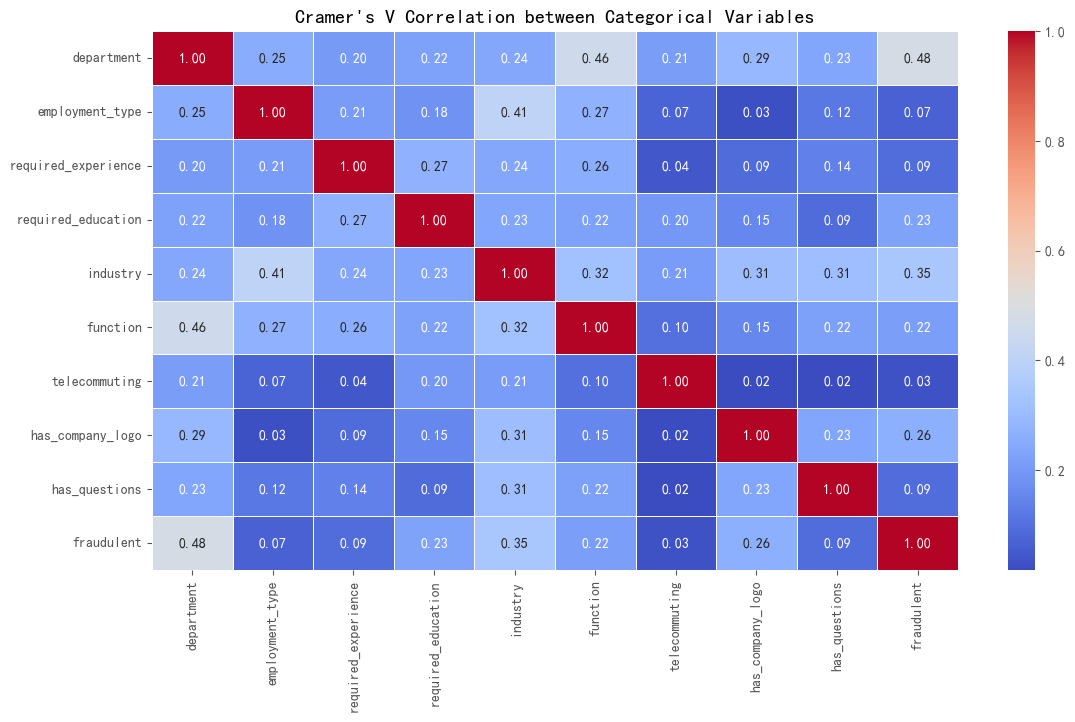

In [46]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 选择用于分析的变量
categorical_columns = ['department', 'employment_type', 'required_experience', 'required_education',
                       'industry', 'function', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']
for column in categorical_columns:
    if new_df[column].dtype == 'object':
        new_df = pd.get_dummies(df, columns=[column], prefix=column)



correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0
        else:
            correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])




plt.figure(figsize=(13, 7))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Cramer's V Correlation between Categorical Variables")
plt.show()

#### Cramer's V Correlation between Categorical Variables图解
1.部门信息（department）和行业信息（industry）与欺诈行为的相关性较高，可能是识别欺诈的重要特征。

2.公司是否有标志（has_company_logo）也是一个值得关注的特征。

3.其他变量的相关性较低，可能在模型构建时可以考虑降维或忽略这些特征。

In [47]:
df=df.fillna('Missing')

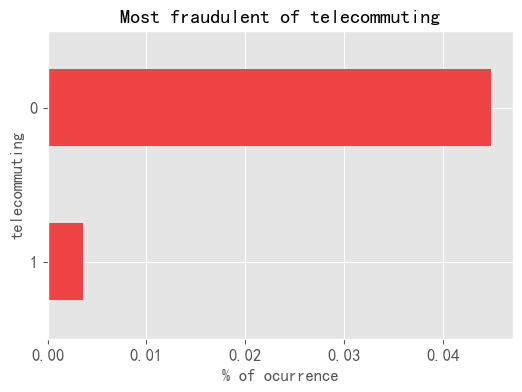

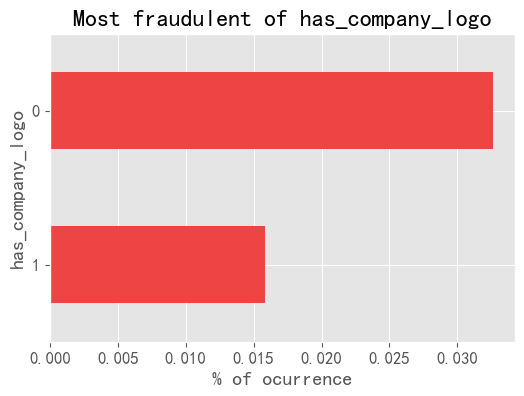

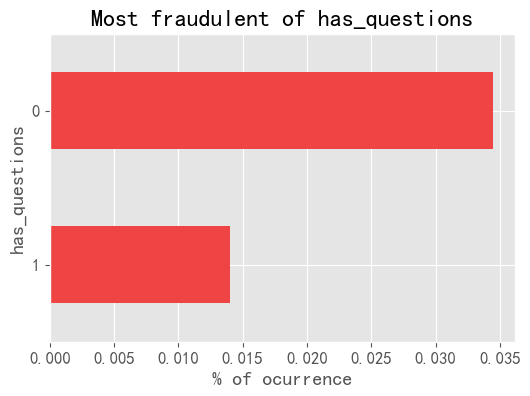

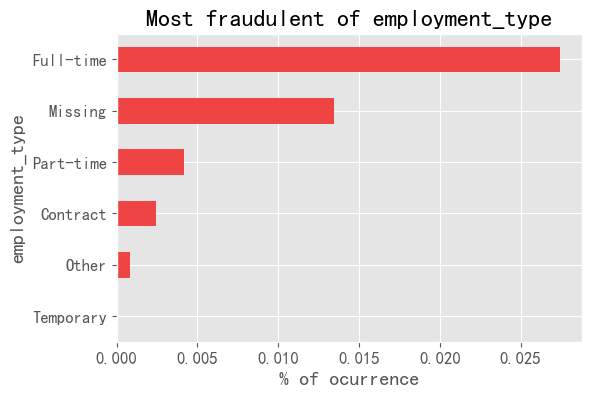

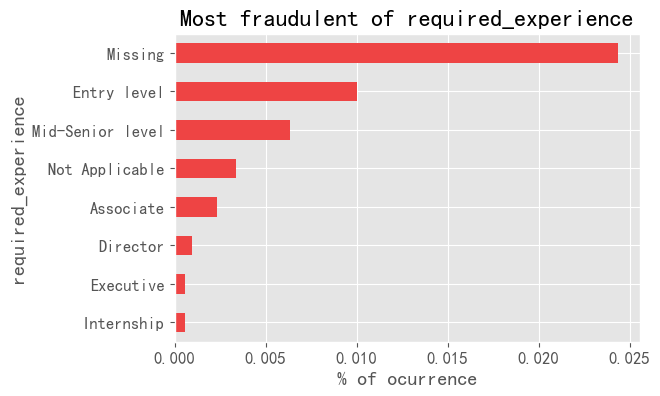

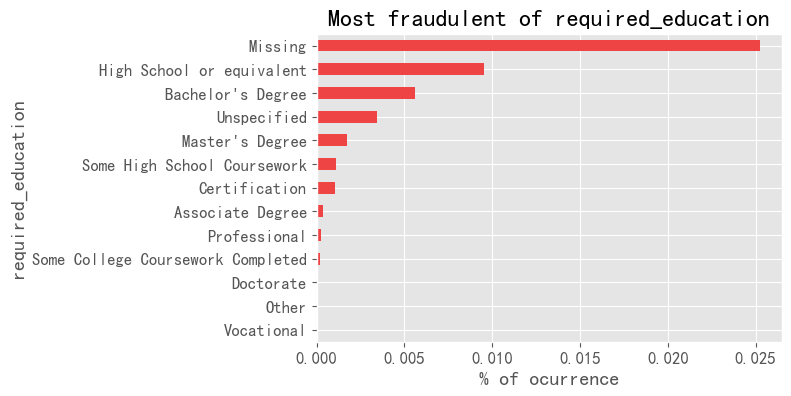

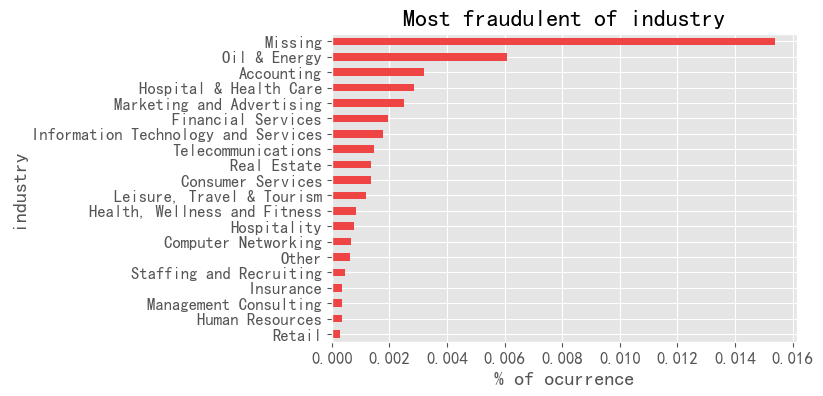

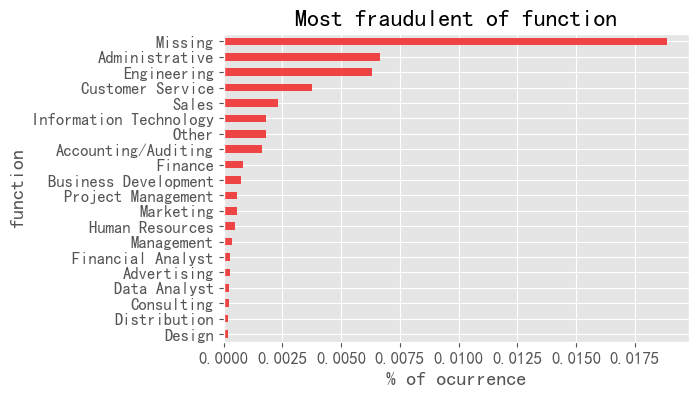

In [48]:
myfeature=['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
'required_experience', 'required_education', 'industry', 'function'
       ]

for feature_index in myfeature:
    department_cross = pd.crosstab(df[feature_index], df["fraudulent"], normalize=True)

    department_cross_filtered = department_cross[1].sort_values(ascending=False).iloc[0:20]

    plt.figure(figsize=(6, 4))
    department_cross_filtered.plot(title=f"Most fraudulent of {feature_index}", kind="barh", color="#E44", fontsize="12", grid=True)
    plt.xlabel("% of ocurrence")
    plt.gca().invert_yaxis()
    plt.rcParams["font.size"] = "12"
    plt.show()


各字段在欺诈情况中图片解读：

1.telecommuting:从图中可以看出，在没有远程工作（状态0）的情况下，欺诈行为的发生比例非常高，接近0.05；而在有远程工作（状态1）的情况下，欺诈行为的发生比例相对较低，大约在0.003左右。这表明，在这个数据集中，没有远程工作的工作岗位更容易出现欺诈行为。

2.has_company_logo:从图中可以看出，在没有公司标志（状态0）的情况下，欺诈行为的发生比例非常高，接近0.032；而在有公司标志（状态1）的情况下，欺诈行为的发生比例相对较低，大约在0.015左右。这表明，在这个数据集中，没有公司标志的职位更容易出现欺诈行为。

3.has_questions:在没有问题（状态0）的情况下，欺诈行为的发生比例非常高，接近0.035；而在有问题（状态1）的情况下，欺诈行为的发生比例相对较低，大约在0.014左右。这表明，在这个数据集中，没有问题的职位更容易出现欺诈行为。

4.employment_type:这张图展示了不同就业类型（employment_type）与欺诈行为之间的关系，具体来说是关于哪些就业类型最常出现欺诈行为。从图中可以看出，全职（Full-time）的欺诈行为发生比例最高，接近0.027；其次是缺失信息（Missing），欺诈行为发生比例约为0.013；兼职（Part-time）的欺诈行为发生比例较低，大约在0.004左右；合同工（Contract）的欺诈行为发生比例更低，接近0.002；其他类型（Other）和临时工（Temporary）的欺诈行为发生比例非常低，几乎为0。这表明，在这个数据集中，全职职位最容易出现欺诈行为，而临时工职位则最少出现欺诈行为。

5.required_experience:这张图展示了不同所需经验（required_experience）与欺诈行为之间的关系，具体来说是关于哪些经验要求最常出现欺诈行为。从图中可以看出，缺失信息（Missing）的欺诈行为发生比例最高，接近0.025；其次是入门级（Entry level），欺诈行为发生比例约为0.01；中级到高级（Mid-Senior level）的欺诈行为发生比例也较高，约为0.007。其他经验要求如不适用（Not Applicable）、副职（Associate）、总监（Director）、执行（Executive）和实习（Internship）的欺诈行为发生比例相对较低。这表明，在这个数据集中，缺失信息和入门级经验要求的职位最容易出现欺诈行为。

6.required_education:缺失信息（Missing）的欺诈行为发生比例最高，接近0.025；其次是高中或同等学历（High School or equivalent），欺诈行为发生比例约为0.01；学士学位（Bachelor's Degree）和未指定（Unspecified）的欺诈行为发生比例也较高，分别约为0.006和0.004。其他教育要求如硕士学位（Master's Degree）、部分高中课程（Some High School Coursework）等的欺诈行为发生比例相对较低。这表明，在这个数据集中，缺失信息和高中或同等学历的职位最容易出现欺诈行为。

7.industry：缺失信息（Missing）的欺诈行为发生比例最高，接近0.016；其次是石油和能源（Oil & Energy），欺诈行为发生比例约为0.005；会计（Accounting）行业的欺诈行为发生比例也较高，约为0.004。其他行业的欺诈行为发生比例相对较低，例如医院和医疗保健（Hospital & Health Care）、市场营销和广告（Marketing and Advertising）等。这表明，在这个数据集中，缺失信息和石油与能源行业的职位最容易出现欺诈行为。

8.缺失信息（Missing）的欺诈行为发生比例最高，接近0.018；其次是行政管理（Administrative），欺诈行为发生比例约为0.0075；工程（Engineering）和客户服务（Customer Service）的欺诈行为发生比例也较高，分别约为0.006和0.0045。其他职能如信息技术（Information Technology）、销售（Sales）等的欺诈行为发生比例相对较低。这表明，在这个数据集中，缺失信息和行政管理职能的职位最容易出现欺诈行为。

##### 将location进行拆分

In [49]:

# 统一逗号前后的空格
df['location'] = df['location'].str.strip().str.replace(' ,', ',').str.replace(', ', ',')

# 分割字段，并限制最大分割数为2，以确保最多获得3个部分
split_columns = df['location'].str.split(',', n=2, expand=True)

# 确保总是有三列，用空字符串填充缺失的部分
split_columns = split_columns.reindex(columns=[0, 1, 2]).fillna('')

# 重命名分割后的列
split_columns.columns = ['country', 'state', 'city']

# 将分割后的列加入到原数据框中
df = pd.concat([df, split_columns], axis=1)
df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city
1065,1066,Trades and Labour Construction Recruitment Con...,"GB,,",Missing,Missing,"Recruitment to Recruitment specialists, coveri...","My client is looking for an experienced, 12 mo...",Missing,Missing,0,...,0,Missing,Missing,Missing,Missing,Missing,0,GB,,
10760,10761,Customer Service Technical Specialist,"US,TN,Franklin",Missing,Missing,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Required Qualifications:High school diploma or...,Missing,0,...,0,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service,0,US,TN,Franklin
14394,14395,Operation Support Developer,"GB,RIC,Twickenham",Missing,35000-45000,With an exceptional record of over 50% growth ...,About WorldstoresWith an exceptional record of...,You must be able to demonstrate the following;...,Missing,0,...,0,Full-time,Mid-Senior level,Missing,Information Technology and Services,Information Technology,0,GB,RIC,Twickenham
3327,3328,Front-End Developer,"DE,BE,Berlin",tech,40000-70000,hello worldtalents23_ drives the change in dig...,Front-End Developer (m/w)Our mission is to ena...,"Degree in Computer science or equivalent, &gt;...",Missing,0,...,1,Full-time,Associate,Bachelor's Degree,Information Technology and Services,Engineering,0,DE,BE,Berlin
801,802,Service Solutions Analyst,"US,CT,Windsor",Missing,Missing,"Novitex Enterprise Solutions, formerly Pitney ...",The Business Solutions Analyst will be located...,Required Qualifications: Proven leadership exp...,Missing,0,...,0,Full-time,Associate,Bachelor's Degree,Hospital & Health Care,Business Analyst,0,US,CT,Windsor


##### 展示国家、洲、城市占比

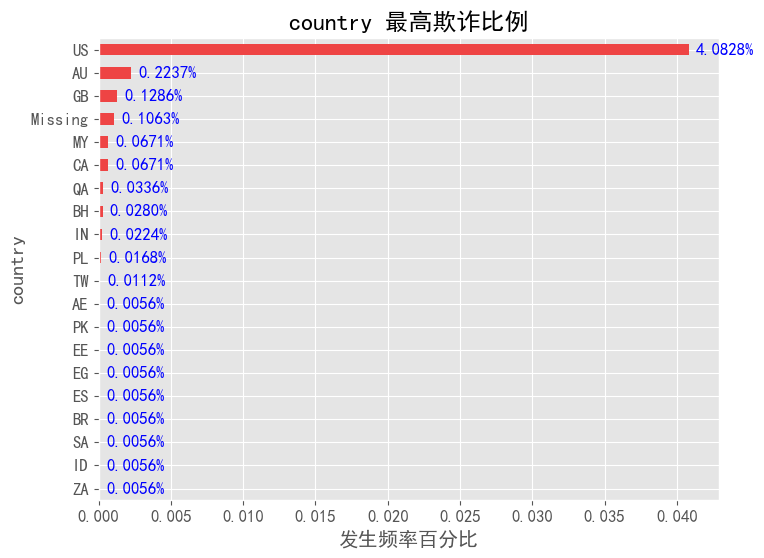

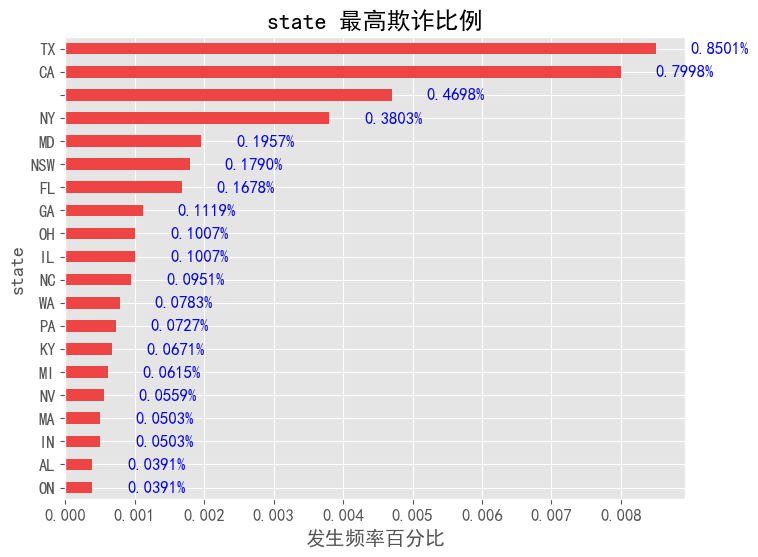

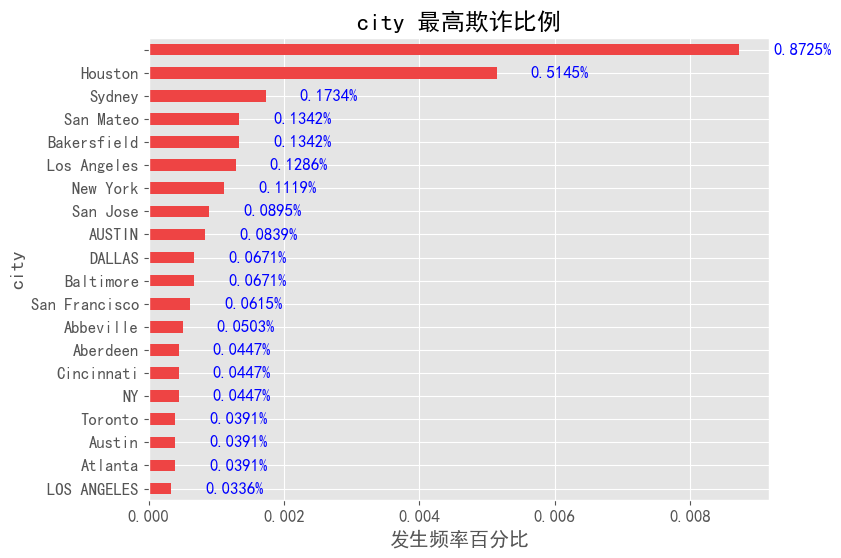

In [50]:
myfeature = ['country', 'state', 'city']

for feature_index in myfeature:
    # 创建交叉表并标准化
    department_cross = pd.crosstab(df[feature_index], df["fraudulent"], normalize=True)

    # 选择欺诈标记为1的列并排序取前20
    department_cross_filtered = department_cross[1].sort_values(ascending=False).iloc[0:20]

    plt.figure(figsize=(8, 6))
    
    # 绘制条形图，并使用bar_label来添加数据标签
    ax = department_cross_filtered.plot(title=f"{feature_index} 最高欺诈比例", kind="barh", color="#E44", fontsize="12", grid=True)
    
    # 添加具体数值标签
    for i, v in enumerate(department_cross_filtered):
        ax.text(v + 0.0005, i, f'{v:.4%}', color='blue', va='center', fontsize=12)  # 添加百分比标签
    
    # 设置x轴标签为中文
    plt.xlabel("发生频率百分比")
    
    # 反转y轴使得最高值在顶部
    plt.gca().invert_yaxis()
    
    # 设置图表标题字体大小
    plt.rcParams["font.size"] = "12"
    
    # 显示图形
    plt.show()

从上图中可以看出，国家中US最容易发生欺诈行为，并且是远远超过其他国家，这里需要进一步判断确定US占总样本，如果说US与其它国家都是相差不大，那么，可以确定US能在一定程度上影响分类模型的判断；如果说US的比例远远大于其他样本的比例，那么可以认为country中，US的贡献不大，没办法区分出是否是欺诈行为。

#### 显示US的分布情况

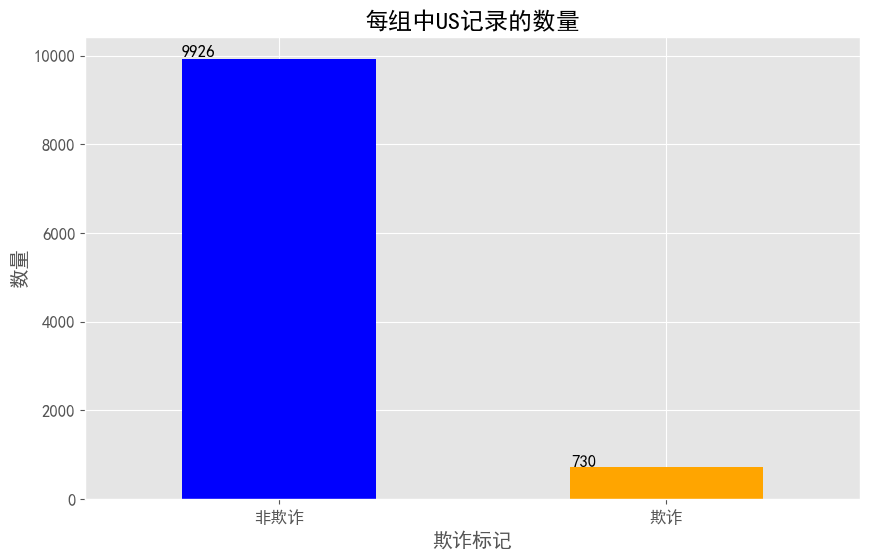

In [51]:
us_fraud_counts = df[df['country'] == 'US'].groupby('fraudulent').size()

# 如果某些组没有 'US' 记录，它们将不会出现在结果中，所以我们需要确保所有组都在内
all_fraud_groups = df['fraudulent'].unique()
us_fraud_counts = us_fraud_counts.reindex(all_fraud_groups, fill_value=0)

# 创建一个条形图
plt.figure(figsize=(10, 6))
bar_plot = us_fraud_counts.plot(kind='bar', color=['blue', 'orange'])

# 设置图表标题和轴标签为中文
plt.title('每组中US记录的数量')
plt.xlabel('欺诈标记')
plt.ylabel('数量')

# 确保x轴标签是水平的，并且使用中文
plt.xticks(rotation=0)
bar_plot.set_xticklabels(['非欺诈' if x == 0 else '欺诈' for x in bar_plot.get_xticks()])

# 显示数值在柱状图上
for p in bar_plot.patches:
    bar_plot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

从图中可以看出，US在欺诈与非欺诈都占据了大部分样本，这个对分类模型应该贡献率不大，所以选取字段时不考虑将city作为特征放入模型训练

##### 展示US各州数据分布

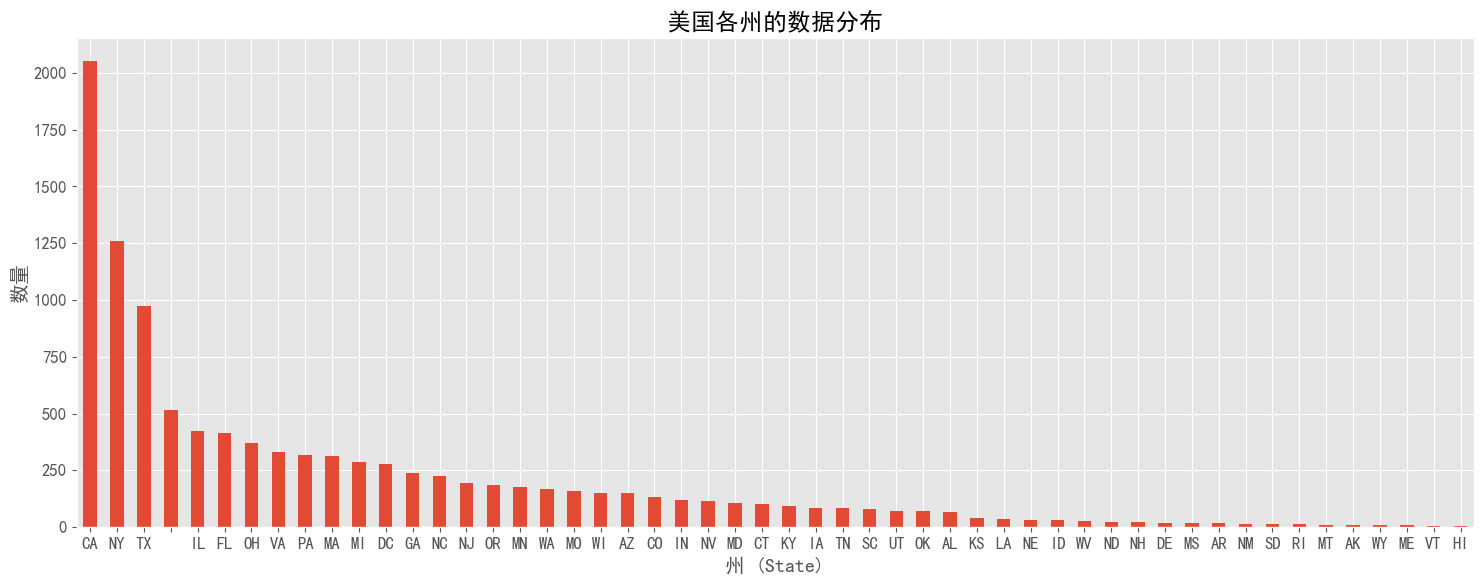

In [52]:
us_data = df[df['country'] == 'US']

# 统计 state 字段的值分布
state_distribution = us_data['state'].value_counts()

# 创建图形和坐标轴
plt.figure(figsize=(15, 6))

# 绘制条形图
state_distribution.plot(kind='bar')

# 设置图表标题和坐标轴标签为中文
plt.title('美国各州的数据分布')
plt.xlabel('州 (State)')
plt.ylabel('数量')
# 保持横坐标标签水平
plt.xticks(rotation=0, ha='center')  # rotation=0 表示不旋转，ha='center' 表示居中对齐

# 调整底部空白以适应标签
plt.tight_layout()
# 展示图表
plt.show()

美国各州的数据分布与state最高欺诈比例图比较，可以看出CA\NY\TX都占了很大比例，无法显著区分是否欺诈，所以这里考虑放弃将state作为特征放入模型训练中